In [253]:
#############################################################################################
# Description:
# In this file we want to apply a neural network to the wine dataset
# The goal is to predict the wine quality as accurately as possible
#
#############################################################################################

# Install keras in case you don't have it yet
# Keras is used to run the neural net
!pip install keras

# This install is needed for some nice output of the neural net
!pip install -q git+https://github.com/tensorflow/docs

In [254]:
# Import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [319]:
# Import both the red and white wine dataset
# IMPORTANT: the folder "data" containing both tables should be in the same folder as the current file
dataset_red = pd.read_csv('data/dataset_red.csv', index_col = 0)
dataset_white = pd.read_csv('data/dataset_white.csv', index_col = 0)

In [320]:
# Look at the head of dataset of red wine to check whether everything looks okay
dataset_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [260]:
# Look at the head of dataset of white wine to check whether everything looks okay
dataset_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [321]:
train_red = dataset_red.sample(frac=0.8,random_state=42)
test_red = dataset_red.drop(train_red.index)

train_white = dataset_white.sample(frac=0.8,random_state=42)
test_white = dataset_white.drop(train_white.index)

In [263]:
train_stats_red = train_red.describe()
train_stats_red.pop("quality")
train_stats_red = train_stats_red.transpose()

train_stats_white = train_white.describe()
train_stats_white.pop("quality")
train_stats_white = train_stats_white.transpose()

In [264]:
# We first look at the redwine
# We remove the outcome variable

train_labels_red = train_red.pop('quality')
test_labels_red = test_red.pop('quality')

train_labels_white = train_white.pop('quality')
test_labels_white = test_white.pop('quality')

In [265]:
def norm(x, mean, std):
  return (x - mean) / std

normed_train_red = norm(train_red, train_stats_red['mean'], train_stats_red['std'])
normed_test_red = norm(test_red, train_stats_red['mean'], train_stats_red['std'])

normed_train_white = norm(train_white, train_stats_white['mean'], train_stats_white['std'])
normed_test_white = norm(test_white, train_stats_white['mean'], train_stats_white['std'])

In [306]:
def build_model(train):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [303]:
model_red = build_model(train_red)
model_white = build_model(train_white)

In [268]:
model_red.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 64)                768       
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 65        
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [269]:
model_white.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 64)                768       
_________________________________________________________________
dense_146 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_147 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 65        
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [270]:
EPOCHS = 1000

history = model.fit(
  normed_train_red, train_labels_red,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.0000,  loss:0.2012,  mae:0.2424,  mse:0.2012,  val_accuracy:0.0000,  val_loss:0.2317,  val_mae:0.2537,  val_mse:0.2317,  
....................................................................................................
Epoch: 100, accuracy:0.0000,  loss:0.0153,  mae:0.0806,  mse:0.0153,  val_accuracy:0.0000,  val_loss:0.2999,  val_mae:0.3783,  val_mse:0.2999,  
....................................................................................................
Epoch: 200, accuracy:0.0000,  loss:0.0081,  mae:0.0622,  mse:0.0081,  val_accuracy:0.0000,  val_loss:0.3617,  val_mae:0.4147,  val_mse:0.3617,  
....................................................................................................
Epoch: 300, accuracy:0.0000,  loss:0.0070,  mae:0.0558,  mse:0.0070,  val_accuracy:0.0000,  val_loss:0.3789,  val_mae:0.4215,  val_mse:0.3789,  
....................................................................................................
Epoch: 400, accur

In [271]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,0.201218,0.242394,0.201218,0.0,0.231727,0.253703,0.231727,0.0,0
1,0.167029,0.231217,0.167029,0.0,0.227695,0.267747,0.227695,0.0,1
2,0.152911,0.225733,0.152911,0.0,0.224452,0.274559,0.224452,0.0,2
3,0.141469,0.225417,0.141469,0.0,0.210859,0.273864,0.210859,0.0,3
4,0.132647,0.217635,0.132647,0.0,0.210727,0.279513,0.210727,0.0,4


In [272]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MSE [quality]')

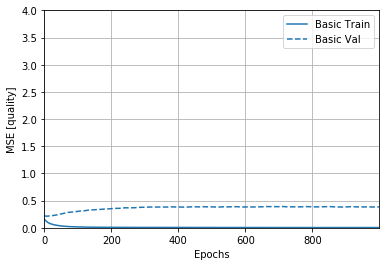

In [273]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 4])
plt.ylabel('MSE [quality]')

In [317]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history = model_red.fit(normed_train_red, train_labels_red, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0420,  mae:0.1452,  mse:0.0420,  val_loss:0.4778,  val_mae:0.4588,  val_mse:0.4778,  
....................................................................................................
Epoch: 100, loss:0.0297,  mae:0.1156,  mse:0.0297,  val_loss:0.4962,  val_mae:0.4813,  val_mse:0.4962,  
.....................

Text(0, 0.5, 'MSE [quality]')

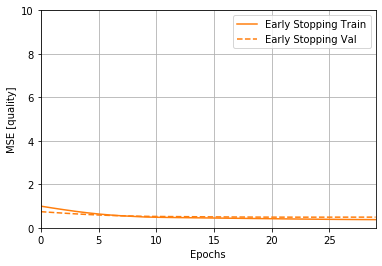

In [299]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MSE [quality]')

In [318]:
loss, mae, mse = model_red.evaluate(normed_test_red, test_labels_red, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
print("Testing set MSE: {:5.2f} ".format(mse))

10/10 - 0s - loss: 0.5796 - mae: 0.5257 - mse: 0.5796
Testing set Mean Abs Error:  0.53 
Testing set MSE:  0.58 


In [277]:
train_labels_red

test_labels_red.tail()

1569    6
1570    6
1573    6
1583    5
1595    6
Name: quality, dtype: int64

In [278]:
model_red.predict(normed_test_red)

array([[5.096731 ],
       [5.6549196],
       [5.3419228],
       [4.7760925],
       [5.2724066],
       [5.5193543],
       [5.5612288],
       [5.6905203],
       [5.9042244],
       [4.6312904],
       [5.019992 ],
       [4.732976 ],
       [5.6689115],
       [5.340666 ],
       [5.106384 ],
       [4.567441 ],
       [5.1022706],
       [4.9823413],
       [5.796894 ],
       [4.8325567],
       [4.9223557],
       [4.915718 ],
       [5.6379457],
       [5.0450544],
       [5.226347 ],
       [5.3411074],
       [5.0221996],
       [4.995901 ],
       [5.365155 ],
       [5.139806 ],
       [5.385248 ],
       [4.764908 ],
       [5.1081877],
       [6.5449114],
       [6.763007 ],
       [4.649139 ],
       [5.4968767],
       [6.265562 ],
       [6.265562 ],
       [5.114772 ],
       [5.607545 ],
       [5.047797 ],
       [5.8953815],
       [5.144132 ],
       [5.961747 ],
       [6.015911 ],
       [5.04891  ],
       [5.3152447],
       [5.1024933],
       [5.738126 ],
